In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist


In [ ]:
(train_image,train_label),(test_image,test_label)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print("training data",train_image.shape,train_label.shape)
print("test data ",test_image.shape,test_label.shape)

training data (60000, 28, 28) (60000,)
test data  (10000, 28, 28) (10000,)


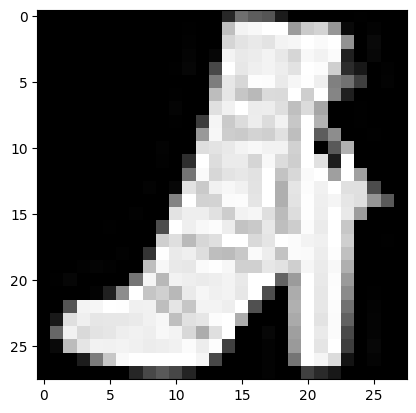

In [ ]:
plt.imshow(train_image[11],cmap='gray')


In [ ]:
print(train_label[9])


5


In [ ]:
train_image = train_image/255.0 # data pre processing
test_image = test_image/255.0


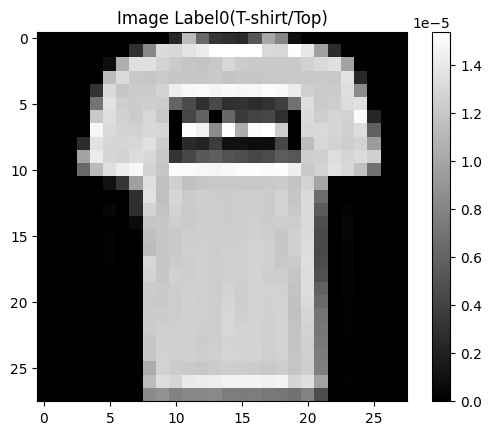

In [ ]:
show_training_image(index)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28),name='Flatten'))
model.add(keras.layers.Dense(256,activation='relu',name='Dense_130_relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10,activation='softmax',name='dense-10-softmax'))

In [ ]:
print('input shape',train_image.shape)
model.summary()

input shape (60000, 28, 28)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense_130_relu (Dense)      (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense-10-softmax (Dense)    (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_hist = model.fit(train_image,train_label,epochs=10,validation_data=(test_image,test_label))


Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 2.3024 - accuracy: 0.1021 - val_loss: 2.3011 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.2964 - accuracy: 0.1393 - val_loss: 2.2880 - val_accuracy: 0.1031
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.2700 - accuracy: 0.2080 - val_loss: 2.2452 - val_accuracy: 0.2335
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.2114 - accuracy: 0.2607 - val_loss: 2.1722 - val_accuracy: 0.3409
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.1302 - accuracy: 0.2966 - val_loss: 2.0832 - val_accuracy: 0.3253
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.0425 - accuracy: 0.3289 - val_loss: 1.9903 - val_accuracy: 0.3854
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.9573 - accuracy: 0.3502 - val_loss: 1.9051 - val_ac

**NLP**

In [ ]:
import nltk
from nltk import word_tokenize
from nltk import sent_tokenize

In [ ]:
import string

In [ ]:
text='Storytelling !!is the social and cultural activity of sharing stories, sometimes with improvisation, theatrics or embellishment. '

In [ ]:
text

'Storytelling !!is the social and cultural activity of sharing stories, sometimes with improvisation, theatrics or embellishment. '

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

segment = sent_tokenize(text)
segment

['Storytelling !',
 '!is the social and cultural activity of sharing stories, sometimes with improvisation, theatrics or embellishment.']

In [ ]:
WT=word_tokenize(text)
WT

['Storytelling',
 '!',
 '!',
 'is',
 'the',
 'social',
 'and',
 'cultural',
 'activity',
 'of',
 'sharing',
 'stories',
 ',',
 'sometimes',
 'with',
 'improvisation',
 ',',
 'theatrics',
 'or',
 'embellishment',
 '.']

In [ ]:
for punc in string.punctuation:
    text=text.replace(punc,'')

In [ ]:
print(text)

Storytelling is the social and cultural activity of sharing stories sometimes with improvisation theatrics or embellishment 


In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words=set(stopwords.words('english'))
cleaned=[]
for word in WT:
    if word.lower() not in stop_words:
        cleaned.append(word)
print(cleaned)

['Storytelling', 'social', 'cultural', 'activity', 'sharing', 'stories', ',', 'sometimes', 'improvisation', ',', 'theatrics', 'embellishment', '.']


In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
stemmed=[PorterStemmer().stem(w) for w in cleaned]
print("Stemming in PorterStemmer")
print(stemmed)

Stemming in PorterStemmer
['storytel', 'social', 'cultur', 'activ', 'share', 'stori', ',', 'sometim', 'improvis', ',', 'theatric', 'embellish', '.']


In [ ]:
import nltk

nltk.pos_tag(cleaned)

[('Storytelling', 'VBG'),
 ('social', 'JJ'),
 ('cultural', 'JJ'),
 ('activity', 'NN'),
 ('sharing', 'VBG'),
 ('stories', 'NNS'),
 (',', ','),
 ('sometimes', 'RB'),
 ('improvisation', 'NN'),
 (',', ','),
 ('theatrics', 'NNS'),
 ('embellishment', 'NN'),
 ('.', '.')]